## *Elements of Machine Learning* 2023
### <font size=3 color='gray'>Alan Reyes-Figueroa</font>

## Descomposición SVD

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
A = np.array([[4, 6, 1], [5, -2, 3], [0, 1, 4]])

In [3]:
print(A)

[[ 4  6  1]
 [ 5 -2  3]
 [ 0  1  4]]


In [4]:
# determinante de A
np.linalg.det(A)

-159.0

In [5]:
l, v = np.linalg.eig(A)

In [6]:
print(l)

[-5.4397457   7.58739471  3.85235099]


In [7]:
print(v)

[[ 0.52750032  0.86008591 -0.60736205]
 [-0.84482763  0.49141402 -0.11603808]
 [ 0.08949686  0.13698354  0.78590489]]


## SVD

In [8]:
U, S, V = np.linalg.svd(A)

In [9]:
print(U)

[[-0.82839971 -0.53978897  0.14960545]
 [-0.48175723  0.8228603   0.30134846]
 [-0.28576896  0.17756347 -0.94170447]]


In [10]:
print(S)

[7.92759226 5.73951042 3.49446722]


In [11]:
print(np.diag(S))

[[7.92759226 0.         0.        ]
 [0.         5.73951042 0.        ]
 [0.         0.         3.49446722]]


In [12]:
print(V)

[[-0.72183139 -0.54148254 -0.43099432]
 [ 0.34064676 -0.82008579  0.4598033 ]
 [ 0.60242778 -0.18508364 -0.77641794]]


In [13]:
USV = U @ np.diag(S) @ V

In [14]:
print(USV)

[[ 4.00000000e+00  6.00000000e+00  1.00000000e+00]
 [ 5.00000000e+00 -2.00000000e+00  3.00000000e+00]
 [ 2.13851562e-15  1.00000000e+00  4.00000000e+00]]


In [15]:
A

array([[ 4,  6,  1],
       [ 5, -2,  3],
       [ 0,  1,  4]])

## Un ejemplo con matriz no cuadrada

In [16]:
B = np.array([[4, 6, 1], [5, -2, 3], [0, 1, 4], [3, 1, -1]])
B.shape

(4, 3)

In [17]:
print(B)

[[ 4  6  1]
 [ 5 -2  3]
 [ 0  1  4]
 [ 3  1 -1]]


In [18]:
U, S, V = np.linalg.svd(B)

In [19]:
print(U)

[[-0.80163081 -0.51671698 -0.06965926 -0.29247085]
 [-0.46152199  0.8297863   0.19339065 -0.24708744]
 [-0.2269597   0.20483683 -0.83424419  0.45887668]
 [-0.30475366 -0.05000131  0.51164859  0.80177353]]


In [20]:
# para construir la matriz \Sigma
matS = np.zeros(B.shape)
min_dimension = min(B.shape[0], B.shape[1])
for i in range(0, min_dimension):
    matS[i,i] = S[i]

In [21]:
print(S)

[8.28414649 5.74596803 4.1661455 ]


In [22]:
print(matS)

[[8.28414649 0.         0.        ]
 [0.         5.74596803 0.        ]
 [0.         0.         4.1661455 ]
 [0.         0.         0.        ]]


In [23]:
print(V)

[[-0.77598751 -0.53336264 -0.33670118]
 [ 0.33624615 -0.80143832  0.49460605]
 [ 0.53364961 -0.27059364 -0.80124726]]


In [24]:
USV = U @ matS @ V

In [25]:
print(USV)

[[ 4.00000000e+00  6.00000000e+00  1.00000000e+00]
 [ 5.00000000e+00 -2.00000000e+00  3.00000000e+00]
 [ 1.00310976e-15  1.00000000e+00  4.00000000e+00]
 [ 3.00000000e+00  1.00000000e+00 -1.00000000e+00]]


In [26]:
B

array([[ 4,  6,  1],
       [ 5, -2,  3],
       [ 0,  1,  4],
       [ 3,  1, -1]])

## Otro ejemplo en 2D

In [27]:
A = np.array([[5, 3], [0, 2]])

In [28]:
print(A)

[[5 3]
 [0 2]]


In [29]:
U, S, V = np.linalg.svd(A)

In [30]:
print(U)

[[ 0.98195639 -0.18910752]
 [ 0.18910752  0.98195639]]


In [31]:
print(S)

[5.9292069  1.68656621]


In [32]:
print(V)

[[ 0.82806723  0.56062881]
 [-0.56062881  0.82806723]]


In [33]:
USV = U @ np.diag(S) @ V

In [34]:
print(USV)

[[5.0000000e+00 3.0000000e+00]
 [4.0597673e-17 2.0000000e+00]]


In [35]:
A

array([[5, 3],
       [0, 2]])

In [36]:
X = -1 + 2*np.random.rand(100,2)
X.shape

(100, 2)

In [37]:
# normalize
for i in range(0, X.shape[0]):
    u = X[i]
    X[i] = u / np.linalg.norm(u)

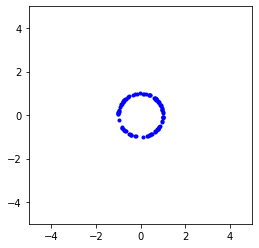

In [38]:
plt.figure(figsize=(4,4))
plt.plot(X[:,0], X[:,1], 'b.')
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show()

In [39]:
Y = X @ A

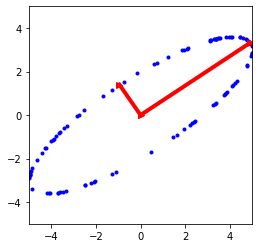

In [40]:
plt.figure(figsize=(4,4))
# elipse
plt.plot(Y[:,0], Y[:,1], 'b.')
# direcciones principales
plt.plot([0,S[0]*V[0,0]], [0, S[0]*V[0,1]], 'r->', lw=4)
plt.plot([0,S[1]*V[1,0]], [0, S[1]*V[1,1]], 'r->', lw=4)
plt.xlim([-5,5])
plt.ylim([-5,5])
plt.show()